![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-ocr-workshop/blob/TrainingNotebooks/tutorials/Certification_Trainings/1.4.Handwritten_Text_Recognition.ipynb)

## Blogposts and videos

- [Text Detection in Spark OCR](https://medium.com/spark-nlp/text-detection-in-spark-ocr-dcd8002bdc97)

- [Table Detection & Extraction in Spark OCR](https://medium.com/spark-nlp/table-detection-extraction-in-spark-ocr-50765c6cedc9)

- [Extract Tabular Data from PDF in Spark OCR](https://medium.com/spark-nlp/extract-tabular-data-from-pdf-in-spark-ocr-b02136bc0fcb)

- [Signature Detection in Spark OCR](https://medium.com/spark-nlp/signature-detection-in-spark-ocr-32f9e6f91e3c)

- [GPU image pre-processing in Spark OCR](https://medium.com/spark-nlp/gpu-image-pre-processing-in-spark-ocr-3-1-0-6fc27560a9bb)

- [How to Setup Spark OCR on UBUNTU - Video](https://www.youtube.com/watch?v=cmt4WIcL0nI)


**More examples here**

https://github.com/JohnSnowLabs/spark-ocr-workshop

For get the trial license please go to:

https://www.johnsnowlabs.com/install/

**Please choose GPU runtime**

In [ ]:
## Setup

In [20]:
import os
from pyspark.ml import PipelineModel
import sparkocr
from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import *

import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

spark = start_spark()

print("Spark OCR Version :", sparkocr.version())

## Read image

In [5]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-ocr-workshop/Fix_handwritten_notebook/jupyter/data/handwritten/handwritten_example.jpg


    Image #0:
    Origin: file:/Users/nmelnik/IdeaProjects/spark-ocr/workshop/tutorials/Certification_Trainings/handwritten_example.png
    Resolution: 72 dpi
    Width: 1350 px
    Height: 1013 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


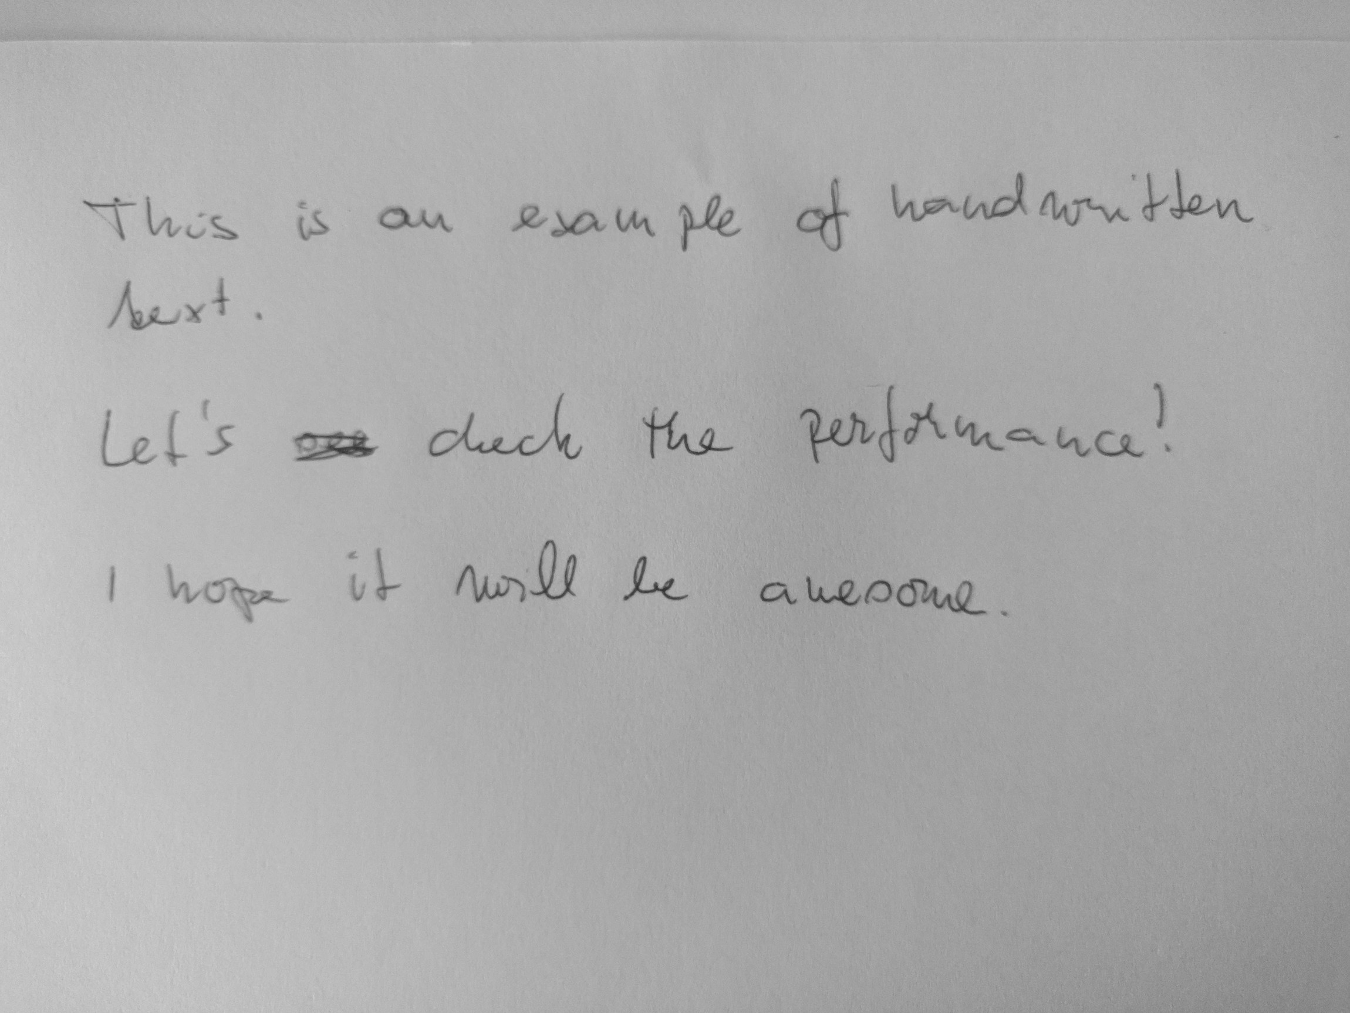

In [6]:
image_example_df = spark.read.format("binaryFile").load("handwritten_example.jpg")
image_df = BinaryToImage().transform(image_example_df).cache()

display_images(image_df)

In [7]:
binary_to_image = BinaryToImage() 
#binary_to_image.setImageType(ImageType.TYPE_3BYTE_BGR)

text_detector = ImageTextDetectorV2 \
    .pretrained("image_text_detector_v2", "en", "clinical/ocr") \
    .setInputCol("image") \
    .setOutputCol("text_regions") \
    .setWithRefiner(True) \
    .setSizeThreshold(10) \
    .setScoreThreshold(0.2) \
    .setTextThreshold(0.2) \
    .setLinkThreshold(0.3) \
    .setWidth(500)

ocr = ImageToTextV2.pretrained("ocr_base_handwritten", "en", "clinical/ocr") \
    .setInputCols(["image", "text_regions"]) \
    .setGroupImages(True) \
    .setOutputCol("text")

draw_regions = ImageDrawRegions() \
    .setInputCol("image") \
    .setInputRegionsCol("text_regions") \
    .setOutputCol("image_with_regions") \
    .setRectColor(Color.green) \
    .setRotated(True)

pipeline = PipelineModel(stages=[
    binary_to_image,
    text_detector,
    ocr,
    draw_regions
])

image_text_detector_v2 download started this may take some time.
Approximate size to download 75.3 MB
ocr_base_handwritten download started this may take some time.
Approximate size to download 745.7 MB


## Run pipeline and show results


    Image #0:
    Origin: file:/Users/nmelnik/IdeaProjects/spark-ocr/workshop/tutorials/Certification_Trainings/handwritten_example.png
    Resolution: 0 dpi
    Width: 1350 px
    Height: 1013 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


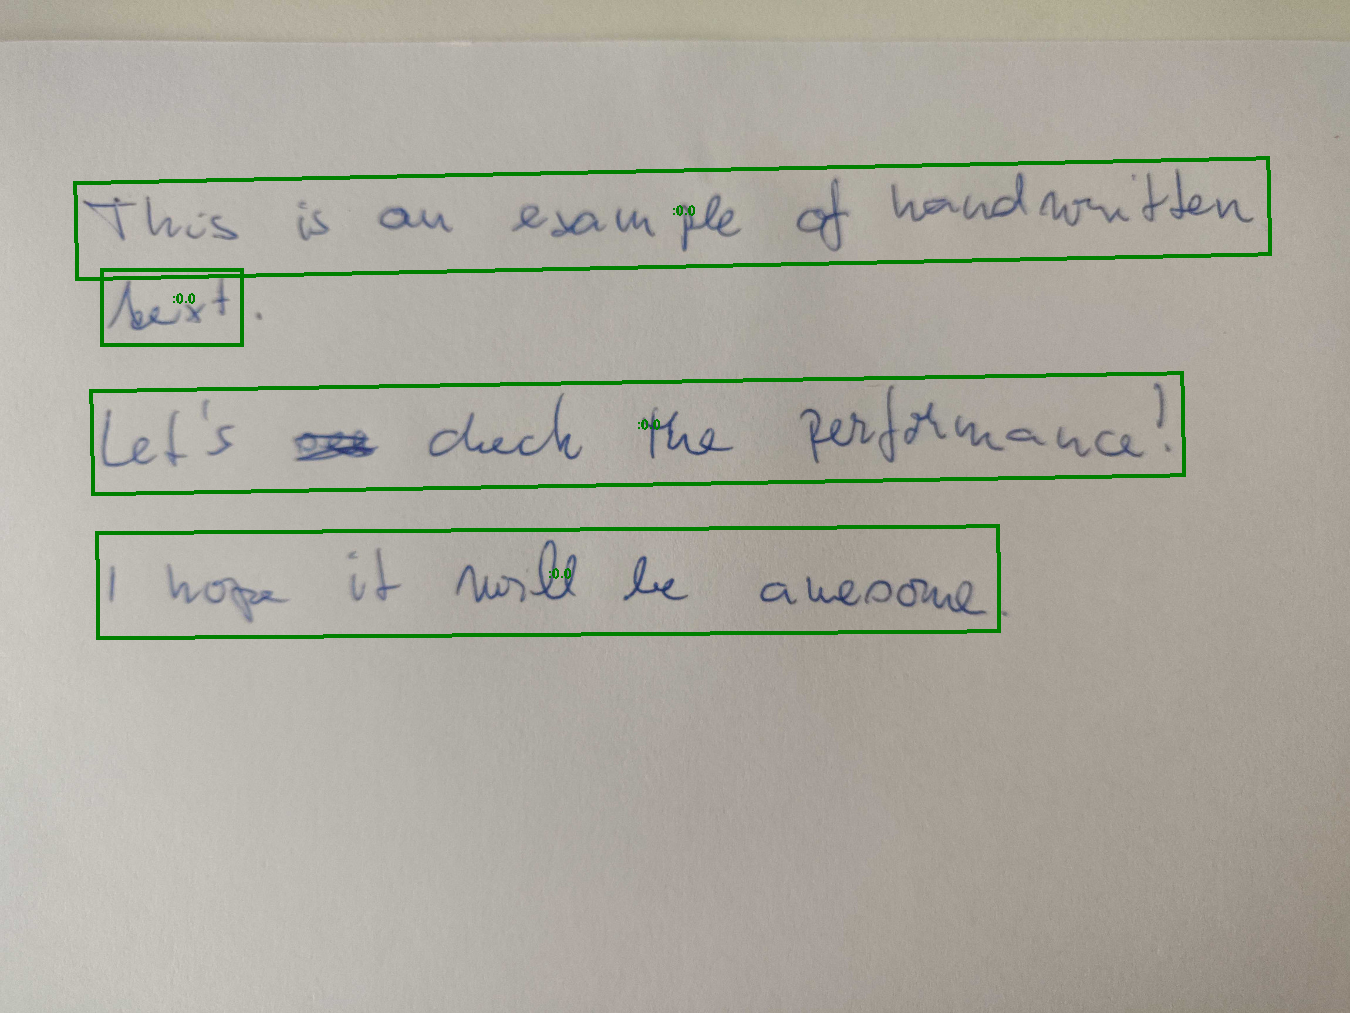

This is an example of handwritten
bext
Let's # check the performance!
" hope it will be awesome


In [8]:
result = pipeline.transform(image_example_df).cache()
display_images(result, "image_with_regions")
print(("").join([x.text for x in result.select("text").collect()]))